In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_set  = pd.read_excel("realistic_data.xlsx")
data_set.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [46]:
x = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 1.12100504, -0.80992339],
       [-0.77756876, -0.60492436],
       [-1.25221221, -0.3120686 ],
       [-1.25221221,  0.94721119],
       [-0.68264007, -0.3120686 ],
       [-0.58771138,  0.12721505],
       [ 1.12100504, -0.80992339],
       [-1.44206959,  0.83006889],
       [-1.25221221, -0.3120686 ],
       [-0.68264007, -0.3120686 ],
       [ 1.12100504, -0.9270657 ],
       [-1.3471409 ,  0.65435543],
       [-0.58771138,  0.09792948],
       [ 1.12100504, -0.9270657 ],
       [ 0.17171814, -0.98563685],
       [-1.3471409 ,  0.65435543],
       [ 1.31086242, -0.13635514],
       [ 1.40579111, -0.37063975],
       [-0.11306793,  2.82148809],
       [-0.11306793, -1.04420801],
       [ 1.5007198 , -0.75135224],
       [-1.3471409 , -1.01492243],
       [-0.77756876, -0.60492436],
       [-0.58771138,  0.88864004],
       [ 1.31086242, -0.13635514],
       [-0.11306793, -1.04420801],
       [-0.68264007, -0.04849841],
       [-1.25221221,  0.94721119],
       [ 1.31086242,

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)


LogisticRegression()

In [51]:
print(classifier.predict(sc.transform([[47, 49000]])))


[1]


In [52]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test , y_pred)
print(cm)
accuracy_score(y_test , y_pred)

[[33  0]
 [ 0 20]]


1.0

<ipython-input-54-34fd1f62bd58>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


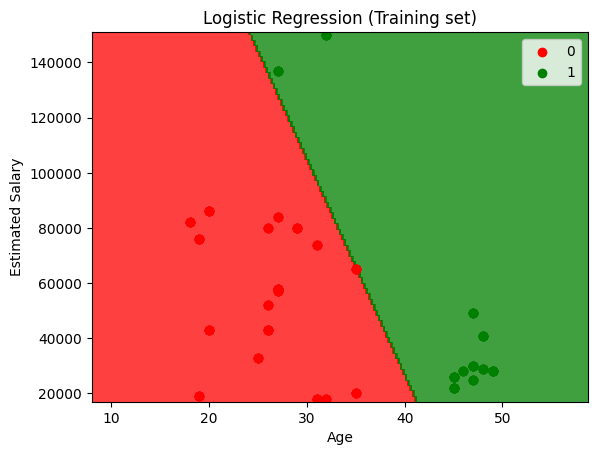

In [54]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train) , y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
    np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                                                                      alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-58-5b25ebfb28ff>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


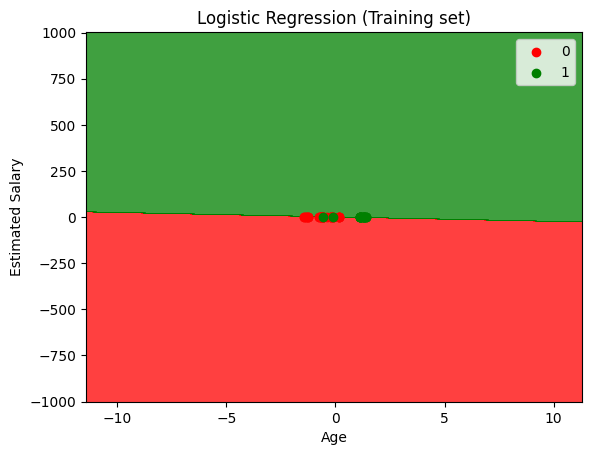

In [58]:
x_set, y_set = sc.inverse_transform(x_test) , y_pred
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
    np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                                                                      alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()